In [1]:
import pandas as pd 
import numpy as np
import csv 
import datetime as dt
import matplotlib.pyplot as plt  

In [2]:
#Loading StockPrices historical data by pandas DataFrame, sorted by date:
StockPrices = pd.read_csv('AAPL.csv', parse_dates=['Date'])
StockPrices.sort_values(by ='Date')
StockPrices.set_index('Date', inplace=True)




In [3]:
#Loading StockPrices historical data by pandas DataFrame, sorted by date:
#StockPrices = pd.read_csv('JPM.csv', parse_dates=['Date'])
#StockPrices.sort_values(by = 'Date')
#StockPrices.set_index('Date', inplace=True)

In [4]:
print(StockPrices.head())

                Open      High       Low     Close  Adj Close       Volume
Date                                                                      
1980-12-12  0.513393  0.515625  0.513393  0.513393   0.023007  117258400.0
1980-12-15  0.488839  0.488839  0.486607  0.486607   0.021807   43971200.0
1980-12-16  0.453125  0.453125  0.450893  0.450893   0.020206   26432000.0
1980-12-17  0.462054  0.464286  0.462054  0.462054   0.020706   21610400.0
1980-12-18  0.475446  0.477679  0.475446  0.475446   0.021307   18362400.0


In [5]:
StockPrices['Returns'] = StockPrices['Adj Close'].pct_change()
StockPrices.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.023007,117258400.0,NaN
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.021807,43971200.0,-0.052158
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.020206,26432000.0,-0.073417
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.020706,21610400.0,0.024745
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.021307,18362400.0,0.029025


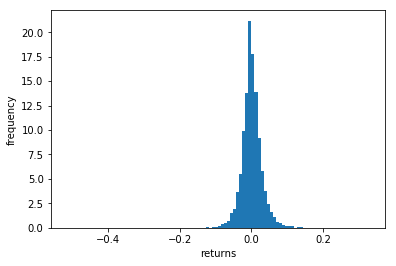

In [30]:
plt.hist(StockPrices["Returns"].dropna(), bins=100, density=True)
plt.xlabel('returns')
plt.ylabel('frequency')
plt.show()

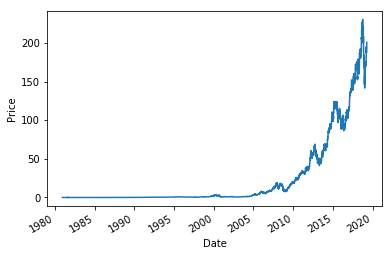

In [31]:
StockPrices["Adj Close"].plot()
plt.ylabel('Price')
plt.show()

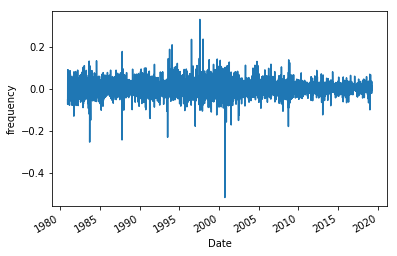

In [35]:
#One way of plotting Returns
Returns = StockPrices["Returns"].plot() 
plt.ylabel('frequency')
plt.show()

In [33]:
#
percent_return = (StockPrices["Returns"]*100).dropna()
print(percent_return.head())

Date
1980-12-15   -5.215804
1980-12-16   -7.341679
1980-12-17    2.474513
1980-12-18    2.902540
1980-12-19    6.101281
Name: Returns, dtype: float64


In [10]:
#one way of averaging daily retunrs
mean_returns_daily = (StockPrices["Returns"].mean())
print(mean_returns_daily)


0.0013732784033799559


In [11]:
#average return of AAPL another way of assigning code
np.mean(StockPrices["Returns"])

0.0013732784033799559

In [12]:
#Annualised return (252 trading days)
ann_return=((1+np.mean(StockPrices["Returns"]))**252)-1
print(ann_return)

0.4131605947150223


In [13]:
# Calculate the implied annualized average return
mean_return_annualized = ((1+ann_return)**252)-1
print(mean_return_annualized)

7.051195383646394e+37


# SD and Variance


In [23]:
Sigma = np.std(StockPrices["Returns"])


In [25]:
# or it can be done by function 
#Squared sigma = variance 
Variance = Sigma**2
print(Variance)

0.0008540765524820401


In [15]:
#Variance is squared Sigma, another way of typing it.(more time consuming as sigma defined already
#1 cell above
np.std(StockPrices["Returns"])**2

0.0008540765524820401

In [22]:
# Annualize the standard deviation
np.std(StockPrices["Returns"]) * np.sqrt(252)

0.46392595446415164

In [28]:
# or just Sigma * np.sqrt(252)
Sigma_annualized = Sigma * np.sqrt(252)
Sigma_annualized


0.46392595446415164

In [29]:
# Annualized Variance 
Annualized_Variance = Sigma_annualized**2
Annualized_Variance

0.2152272912254741

# Skewness

In [17]:
# If skew is higher than 0, - suggestion of non-normality 

from scipy.stats import skew
skew(StockPrices["Returns"].dropna())

-0.28835309365932504

# Kurtosis

In [18]:
# positive excess kurtosis greater than 3 ( 3 need to be subtracted )
from scipy.stats import kurtosis 
kurtosis(StockPrices["Returns"].dropna())


17.52398199845012

In [43]:
from scipy.stats import shapiro
p_value = shapiro(StockPrices["Returns"].dropna())[1]
if p_value <= 0.05:
    print("Null hypothesis of normality is rejected.")
else:
    print("Null hyphotesis of normality is accepted.")

Null hypothesis of normality is rejected.


In [44]:
print(p_value) 

0.0
